In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'default-of-credit-card-clients-dataset' dataset.
Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset
['UCI_Credit_Card.csv']


## Load Data

In [4]:
df = pd.read_csv(os.path.join(path, "UCI_Credit_Card.csv"))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66

## Feature Engineering

drop unnecessary kolom

In [7]:
df = df.drop(columns=["ID"])

data diluar deskripsi dijadikan Unknown

In [8]:
# 0 to Unknown
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 'Unknown')

In [9]:
# 0,5,6 to Unknown
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 'Unknown')

cek ulang isi data

In [10]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

LIMIT_BAL: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX: [2 1]
EDUCATION: [2 1 3 'Unknown' 4]
MARRIAGE: [1 2 3 'Unknown']
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
P

In [11]:
df.info()
df.isnull().sum()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,14030.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,1.603733,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


## EDA

Distribusi Target

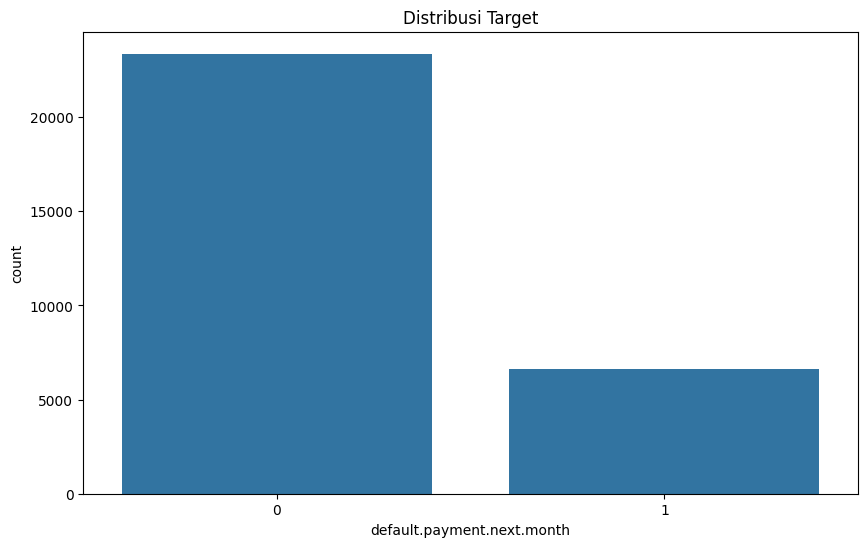

,proportion
default.payment.next.month,
0,0.7788
1,0.2212


In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribusi Target')
plt.show()

df['default.payment.next.month'].value_counts(normalize=True)

Distribusi Numerik

In [13]:
sns.set_style("whitegrid")
sns.set_palette("muted")

feature_pairs = [
    ('AGE', 'LIMIT_BAL'),
    ('BILL_AMT1', 'BILL_AMT2'),
    ('BILL_AMT3', 'BILL_AMT4'),
    ('BILL_AMT5', 'BILL_AMT6'),
    ('PAY_AMT1', 'PAY_AMT2'),
    ('PAY_AMT3', 'PAY_AMT4'),
    ('PAY_AMT5', 'PAY_AMT6')
]

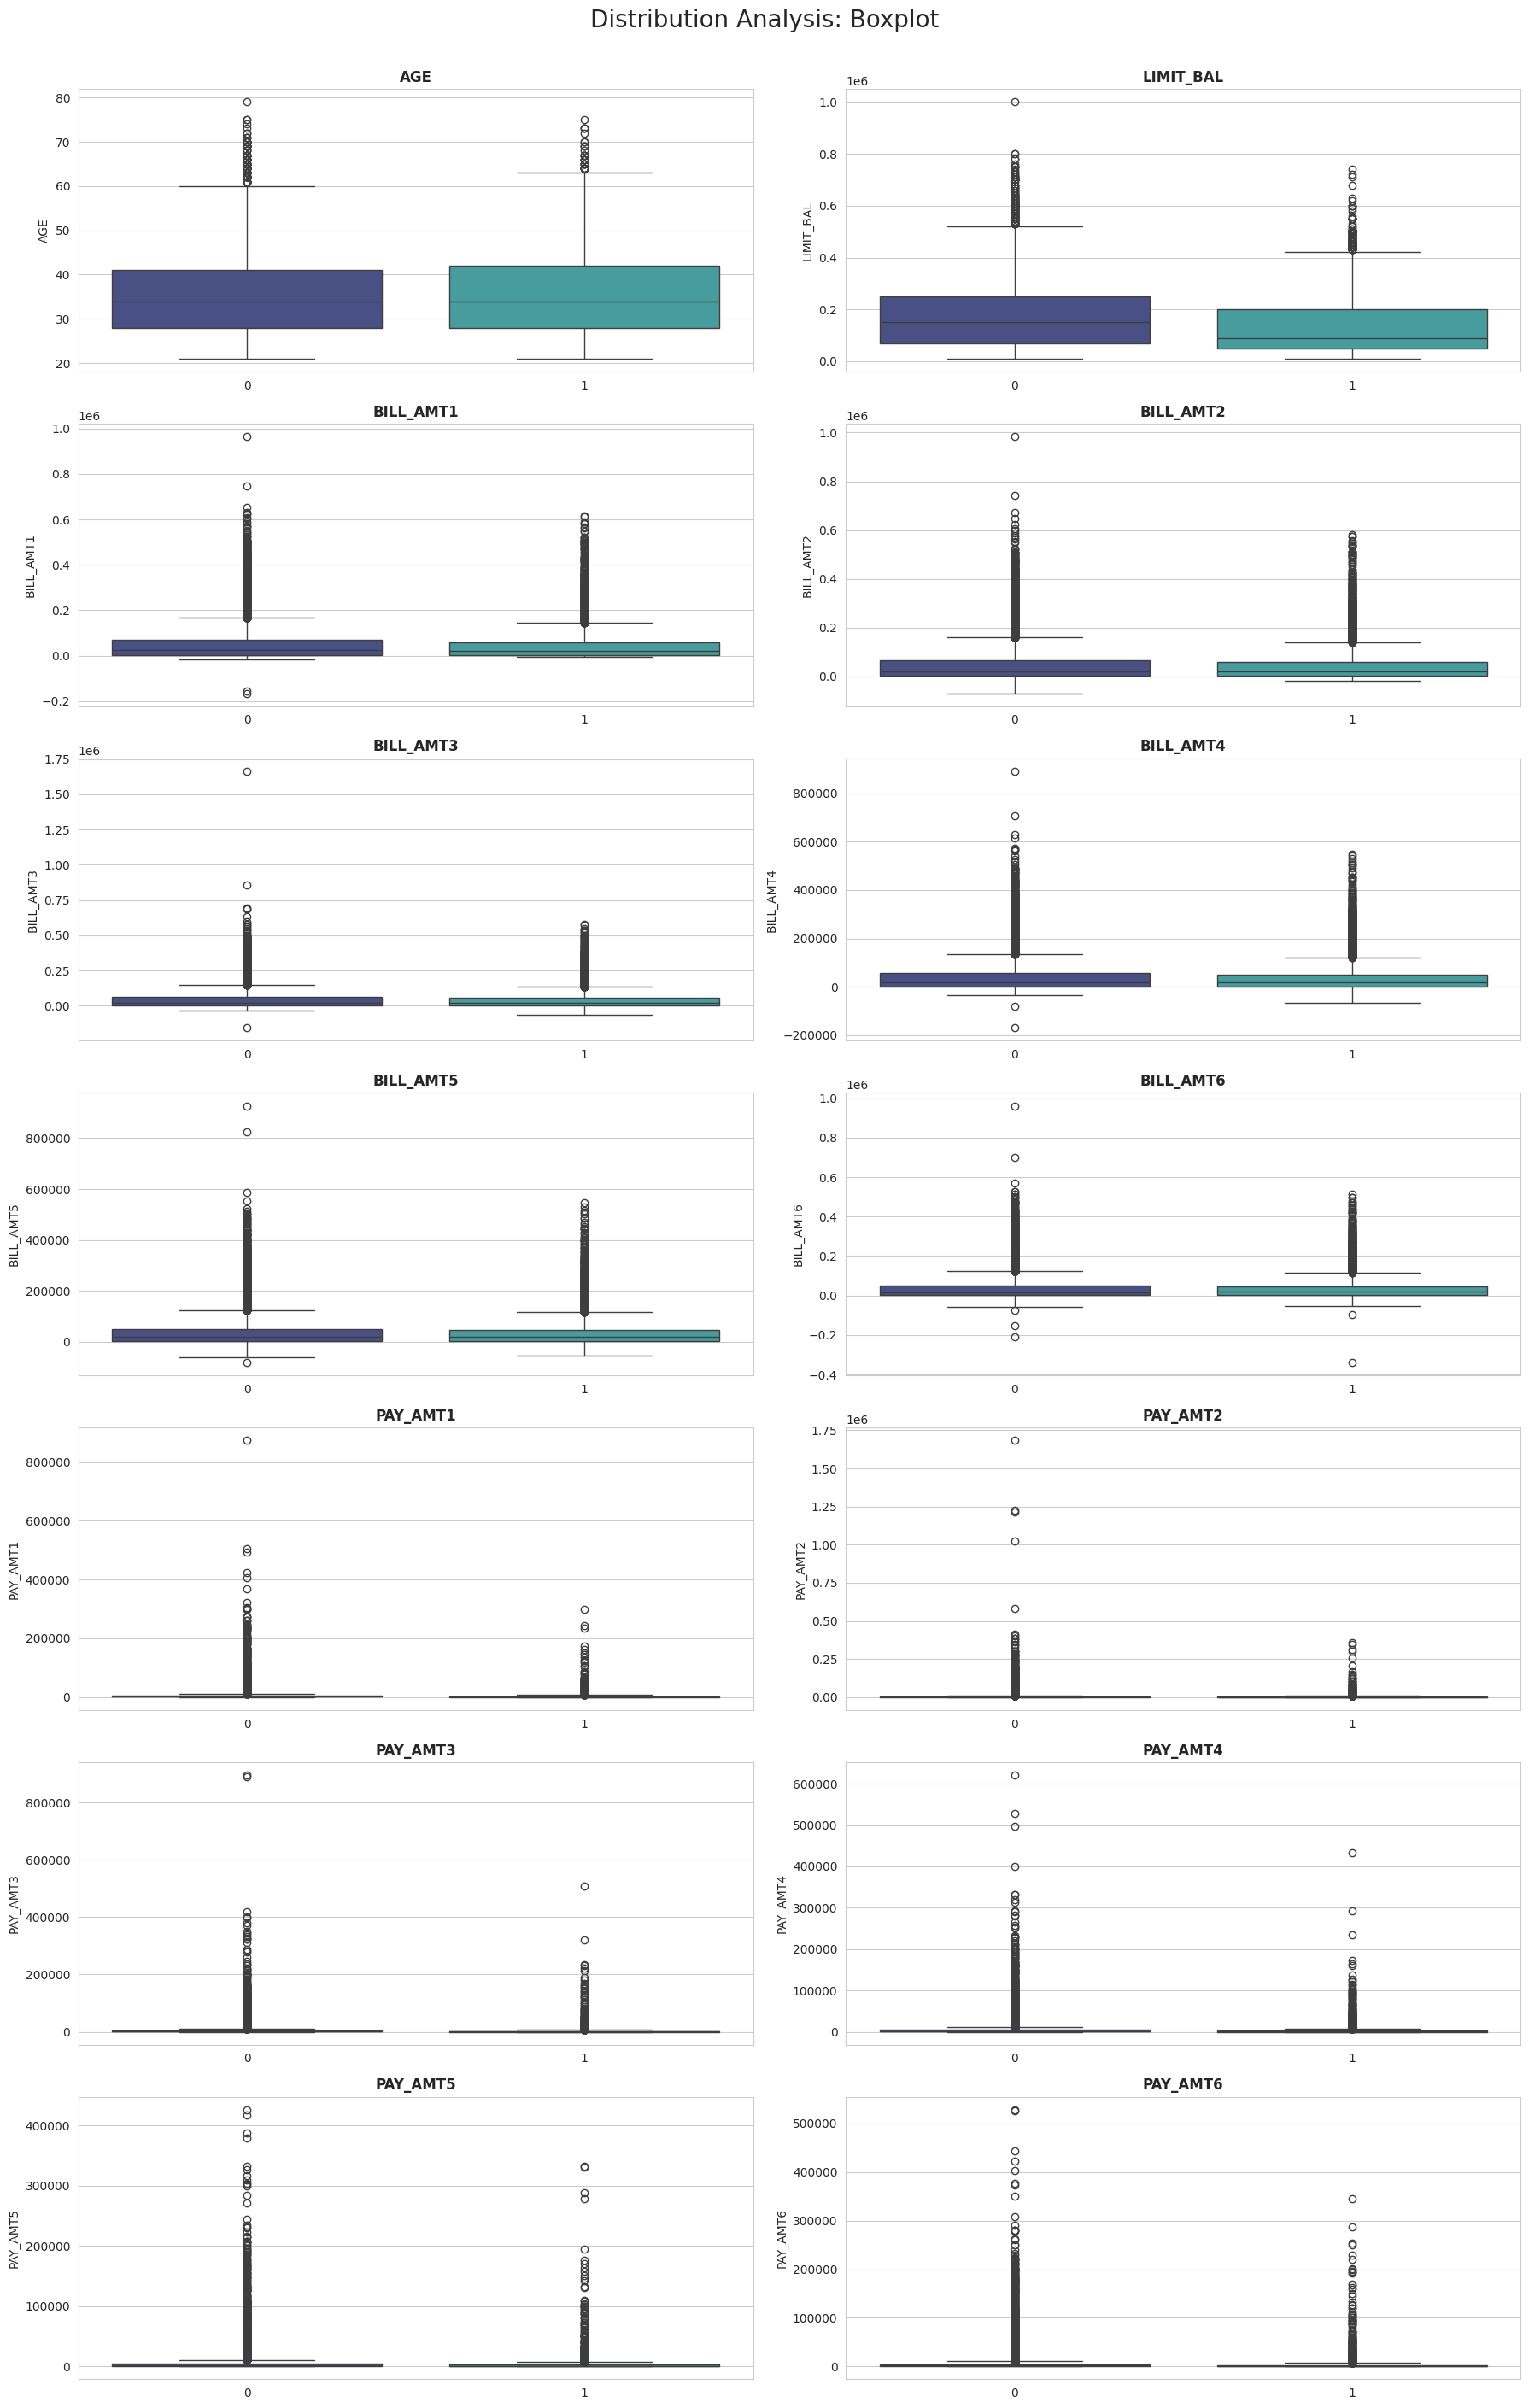

In [14]:
def plot_custom_grid(df, pairs, target_col, kind='box'):
    n_rows = len(pairs)
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

    plot_names = {'box': 'Boxplot', 'hist': 'Histogram', 'kde': 'KDE Plot'}
    fig.suptitle(f'Distribution Analysis: {plot_names.get(kind, kind)}', fontsize=20, y=1.005)

    for i, (col_left, col_right) in enumerate(pairs):

        ax_l = axes[i, 0]
        if kind == 'box':
            sns.boxplot(data=df, x=target_col, y=col_left, ax=ax_l, palette='mako')
        elif kind == 'hist':
            sns.histplot(data=df, x=col_left, hue=target_col, kde=True, element="step", ax=ax_l, palette='mako')
        elif kind == 'kde':
            sns.kdeplot(data=df, x=col_left, hue=target_col, fill=True, ax=ax_l, palette='mako')

        ax_l.set_title(f'{col_left}', fontsize=12, fontweight='bold')
        ax_l.set_xlabel('')

        ax_r = axes[i, 1]
        if kind == 'box':
            sns.boxplot(data=df, x=target_col, y=col_right, ax=ax_r, palette='mako')
        elif kind == 'hist':
            sns.histplot(data=df, x=col_right, hue=target_col, kde=True, element="step", ax=ax_r, palette='mako')
        elif kind == 'kde':
            sns.kdeplot(data=df, x=col_right, hue=target_col, fill=True, ax=ax_r, palette='mako')

        ax_r.set_title(f'{col_right}', fontsize=12, fontweight='bold')
        ax_r.set_xlabel('')

    plt.tight_layout()
    plt.show()

plot_custom_grid(df, feature_pairs, 'default.payment.next.month', kind='box')

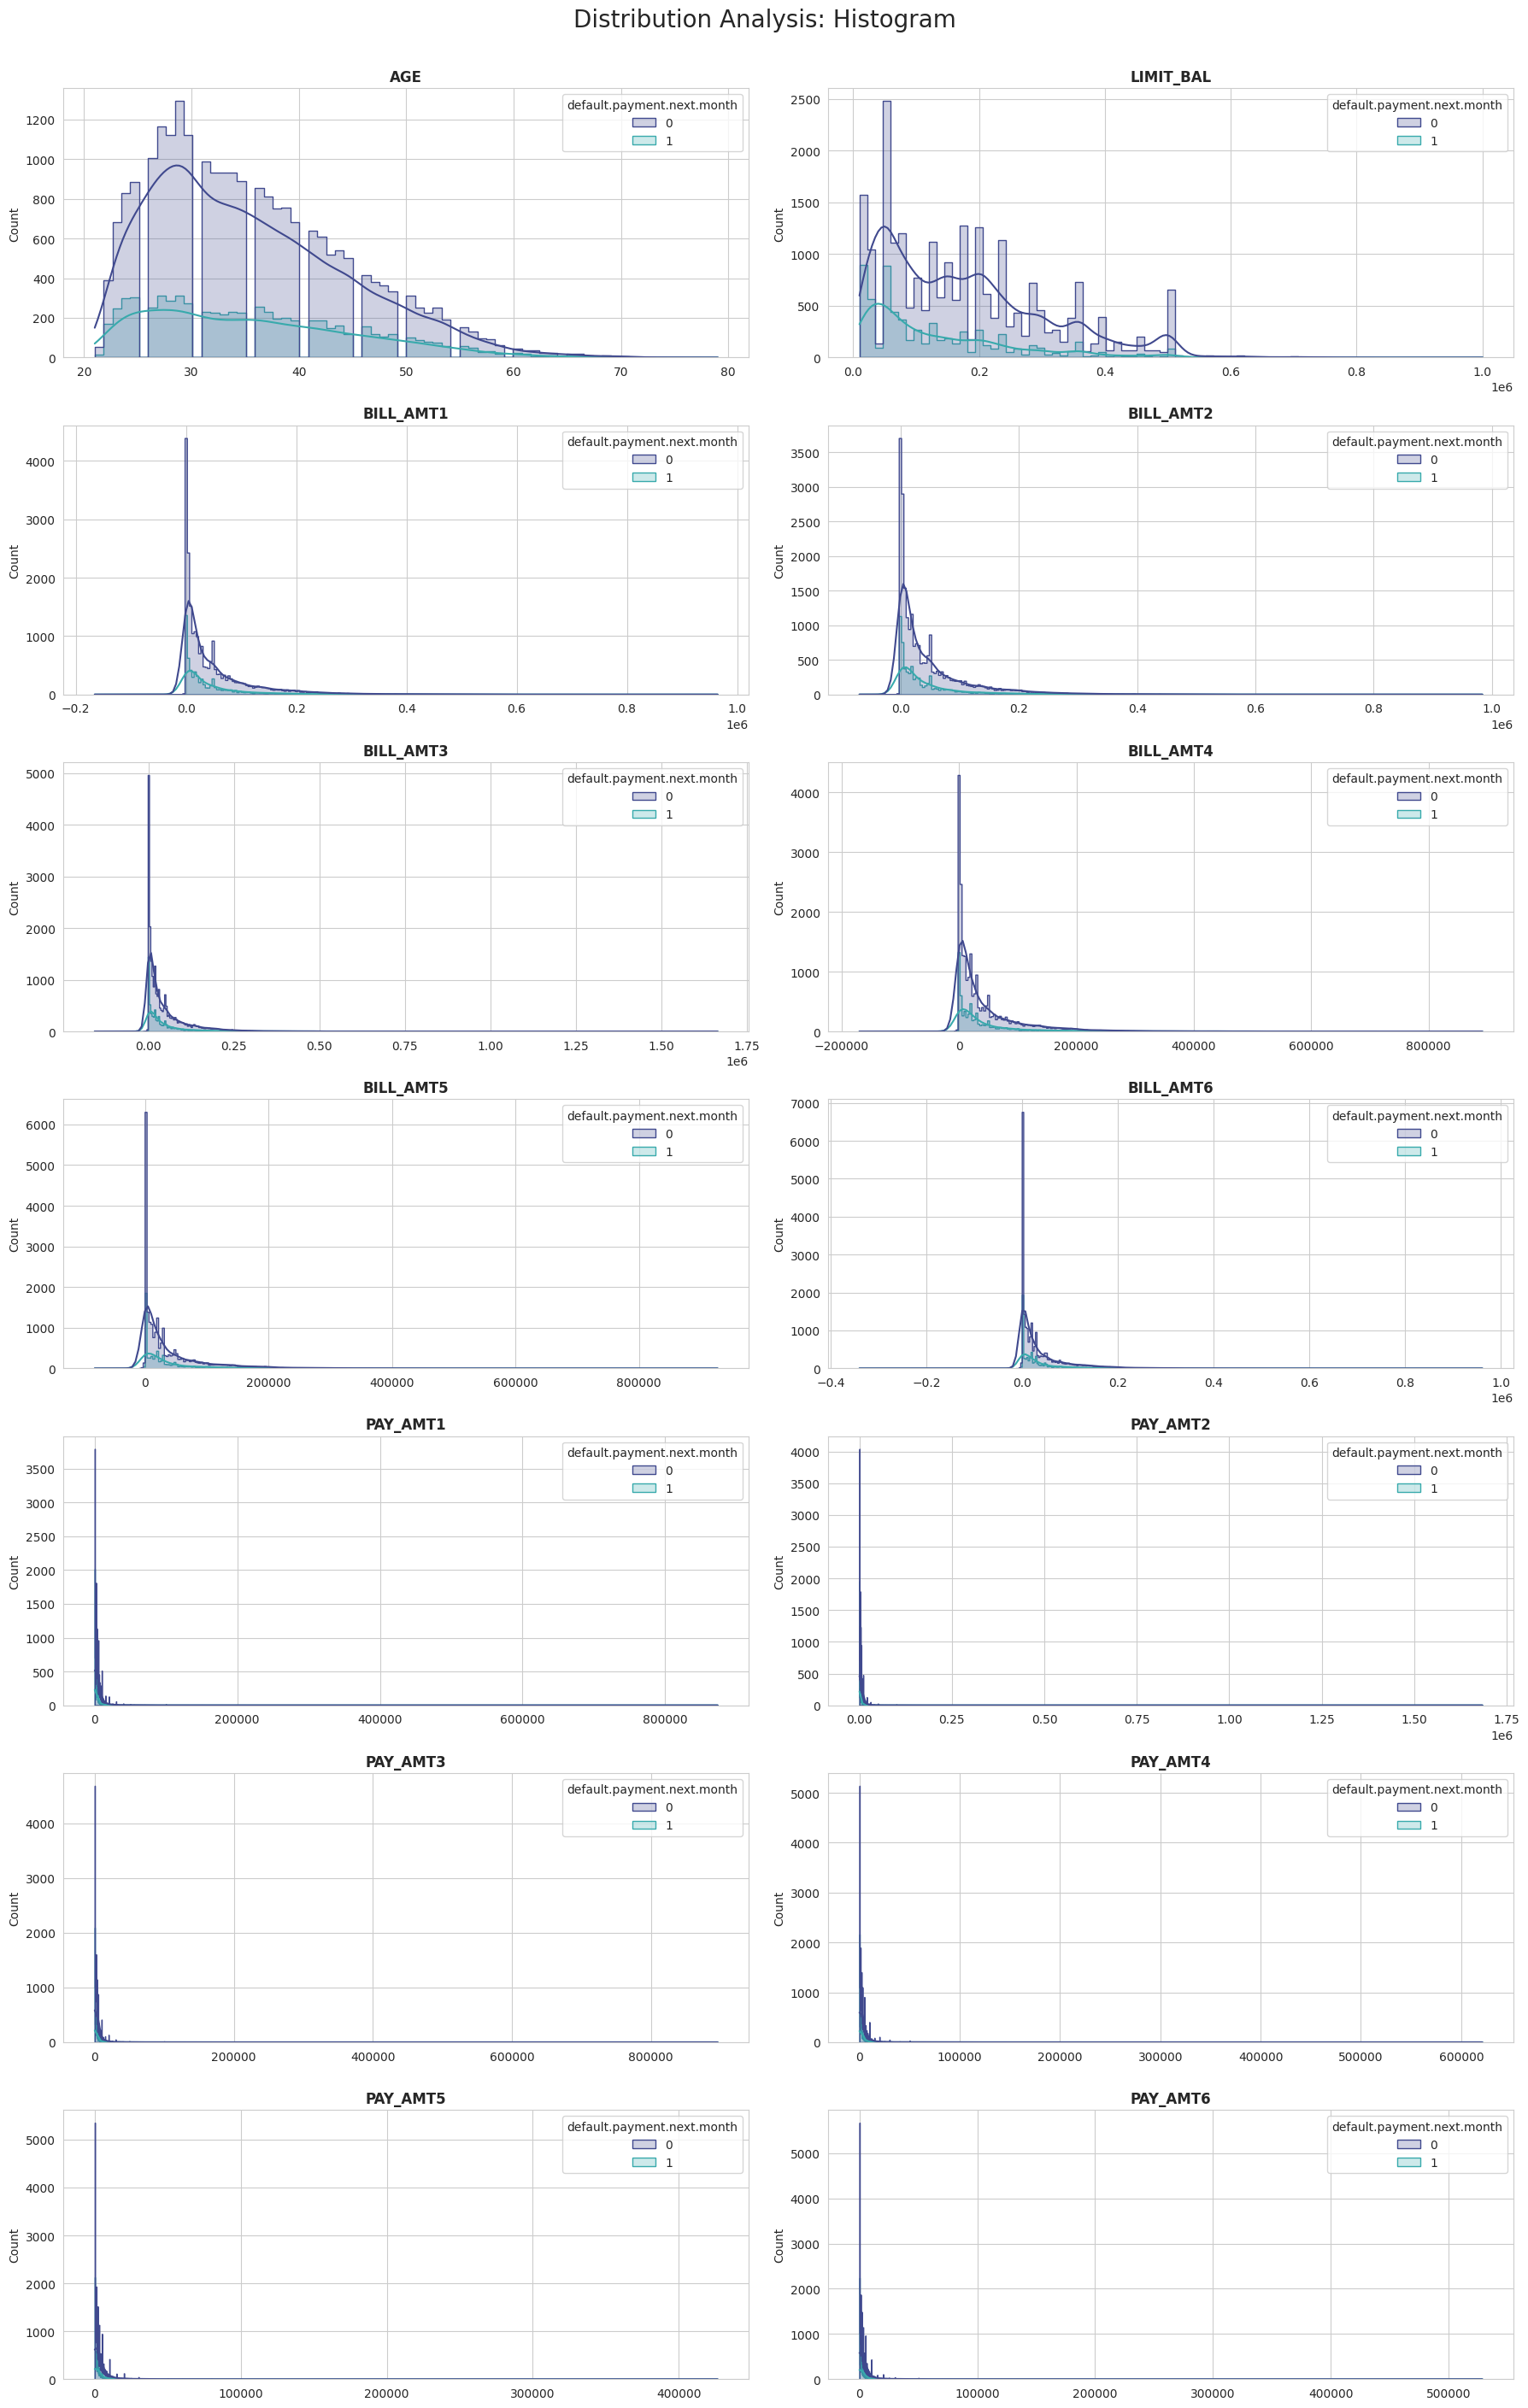

In [15]:
plot_custom_grid(df, feature_pairs, 'default.payment.next.month', kind='hist')

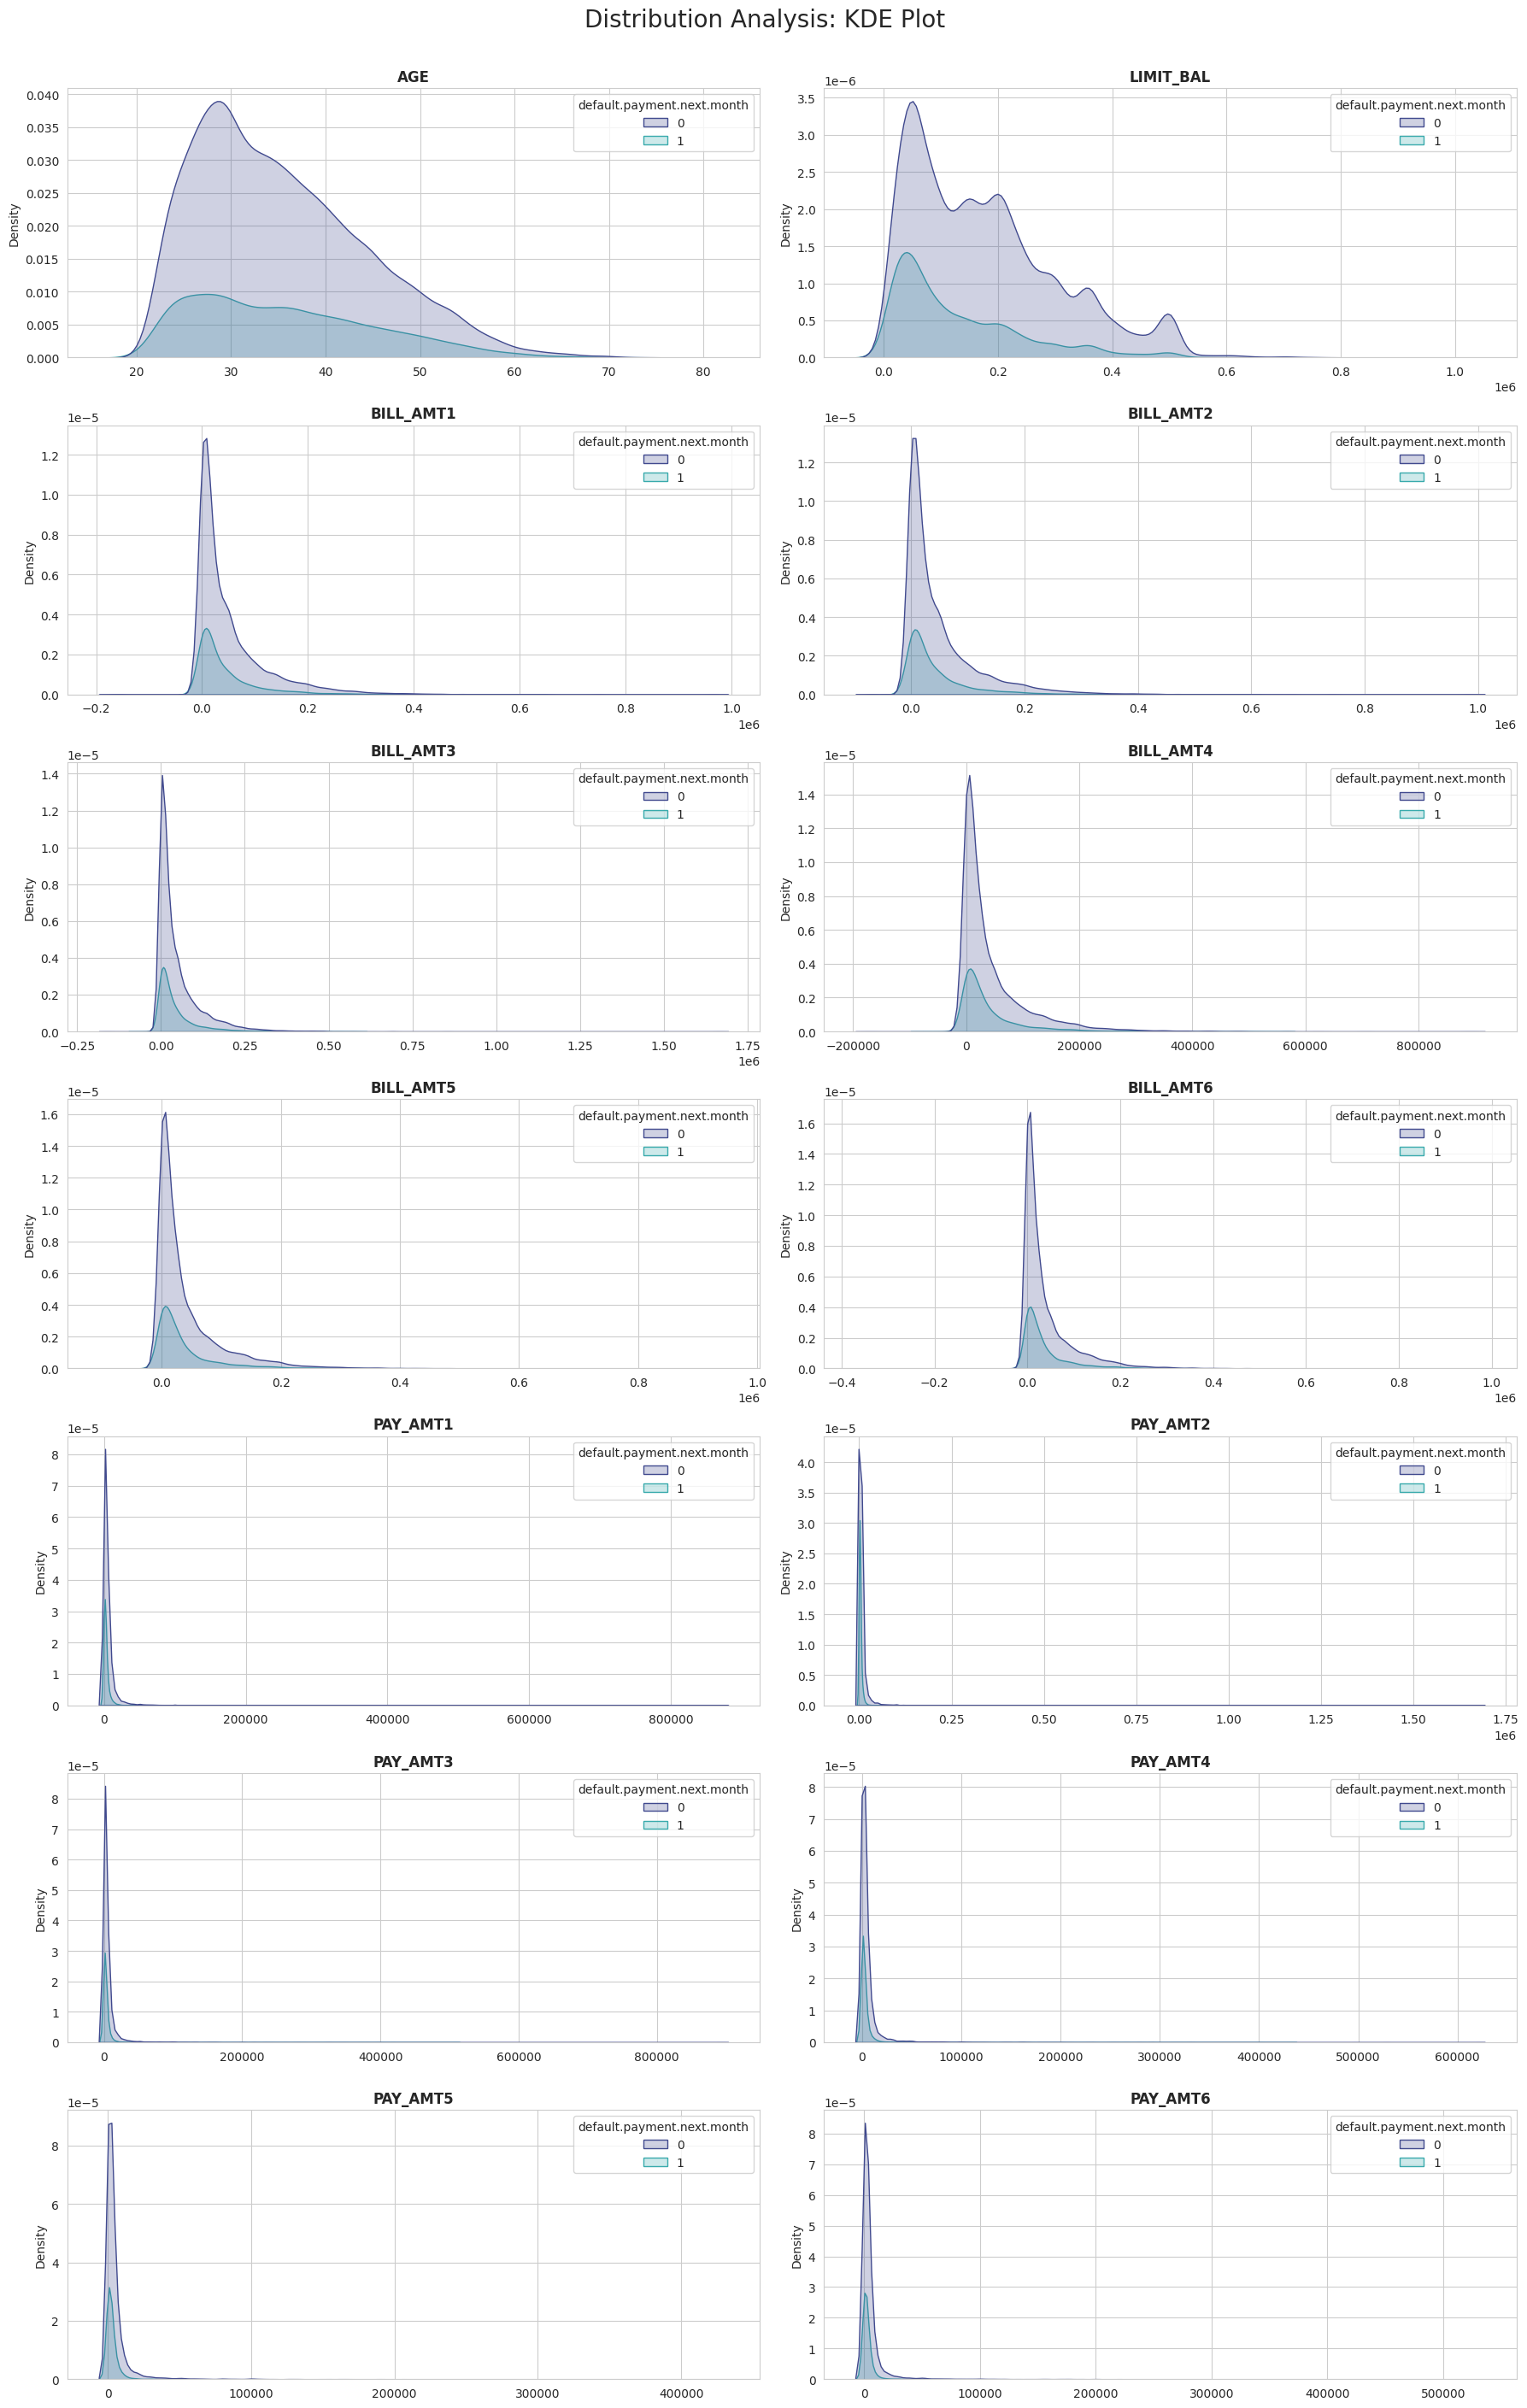

In [16]:
plot_custom_grid(df, feature_pairs, 'default.payment.next.month', kind='kde')

Kategorikal vs Target

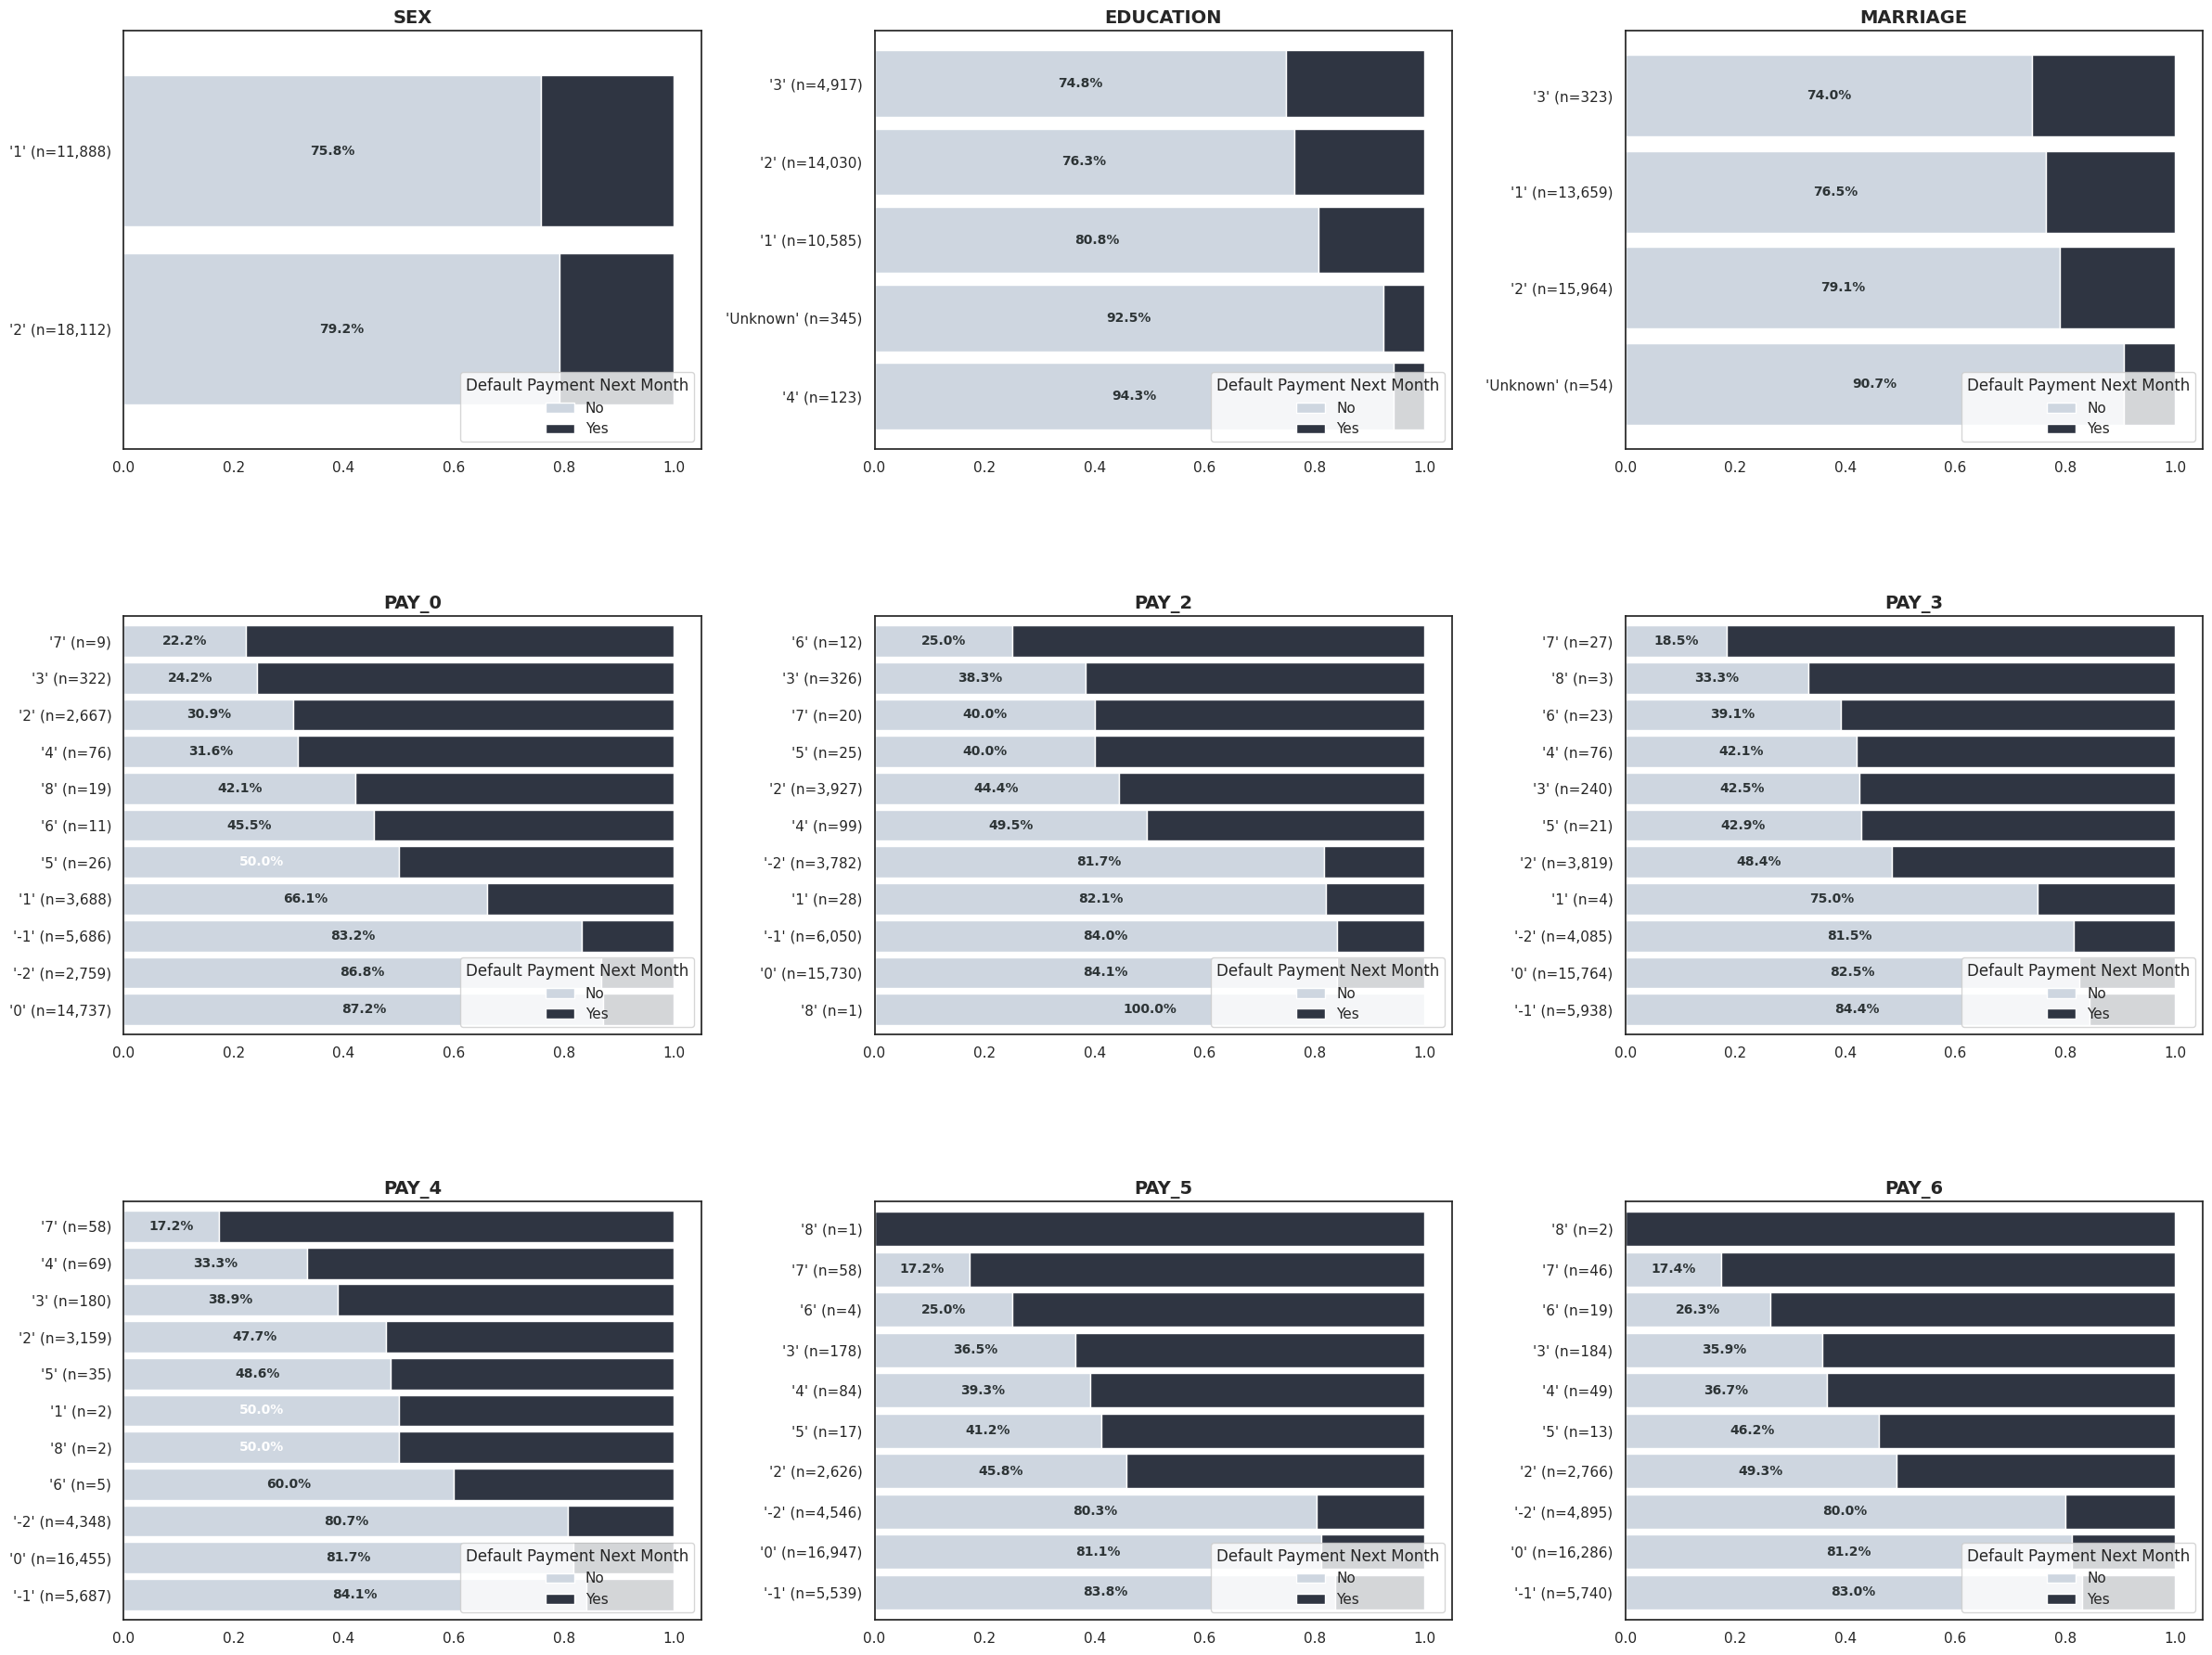

In [17]:
sns.set(style='white', font_scale=1.0)

cat_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]

custom_colors = ['#ced6e0', '#2f3542']

fig, axes = plt.subplots(3, 3, figsize=(24, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()

    cross_tab = pd.crosstab(df[col], df['default.payment.next.month'], normalize='index')

    try:
        target_col = cross_tab.columns[-1]
        cross_tab = cross_tab.sort_values(by=target_col, ascending=True)
    except:
        pass

    new_labels = []
    for cat_name in cross_tab.index:
        count_val = counts[cat_name]
        label_str = f"'{cat_name}' (n={count_val:,})"
        new_labels.append(label_str)

    cross_tab.index = new_labels

    cross_tab.plot(
        kind='barh',
        stacked=True,
        ax=axes[i],
        color=custom_colors,
        width=0.85,
        edgecolor='white'
    )

    axes[i].set_title(f'{col}', fontweight='bold', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Default Payment Next Month', loc='lower right', labels=['No', 'Yes'])

    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab.loc[x], [n]):
            if proportion > 0.05:
                text_color = "white" if proportion == cross_tab.loc[x].iloc[-1] else "#2d3436"

                cum_pos = 0
                idx_col = 0
                if proportion == cross_tab.loc[x].iloc[0]:
                    pos_x = proportion / 2
                else:
                    pos_x = cross_tab.loc[x].iloc[0] + (proportion / 2)

                axes[i].text(
                    x=pos_x,
                    y=y_loc,
                    s=f'{np.round(proportion * 100, 1)}%',
                    color=text_color,
                    fontsize=10,
                    fontweight='bold',
                    ha='center', va='center'
                )

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

PAY n BILL Time Series

In [18]:
pay_cols_chrono = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0']

df['num_late_payments'] = (df[pay_cols_chrono] > 0).sum(axis=1)

df['late_ratio'] = df['num_late_payments'] / len(pay_cols_chrono)

df['max_delay'] = df[pay_cols_chrono].max(axis=1)

df['median_delay'] = (
    df[pay_cols_chrono]
    .replace({-1: 0, -2: 0})
    .median(axis=1)
)

df['severe_delay_count'] = (df[pay_cols_chrono] >= 2).sum(axis=1)

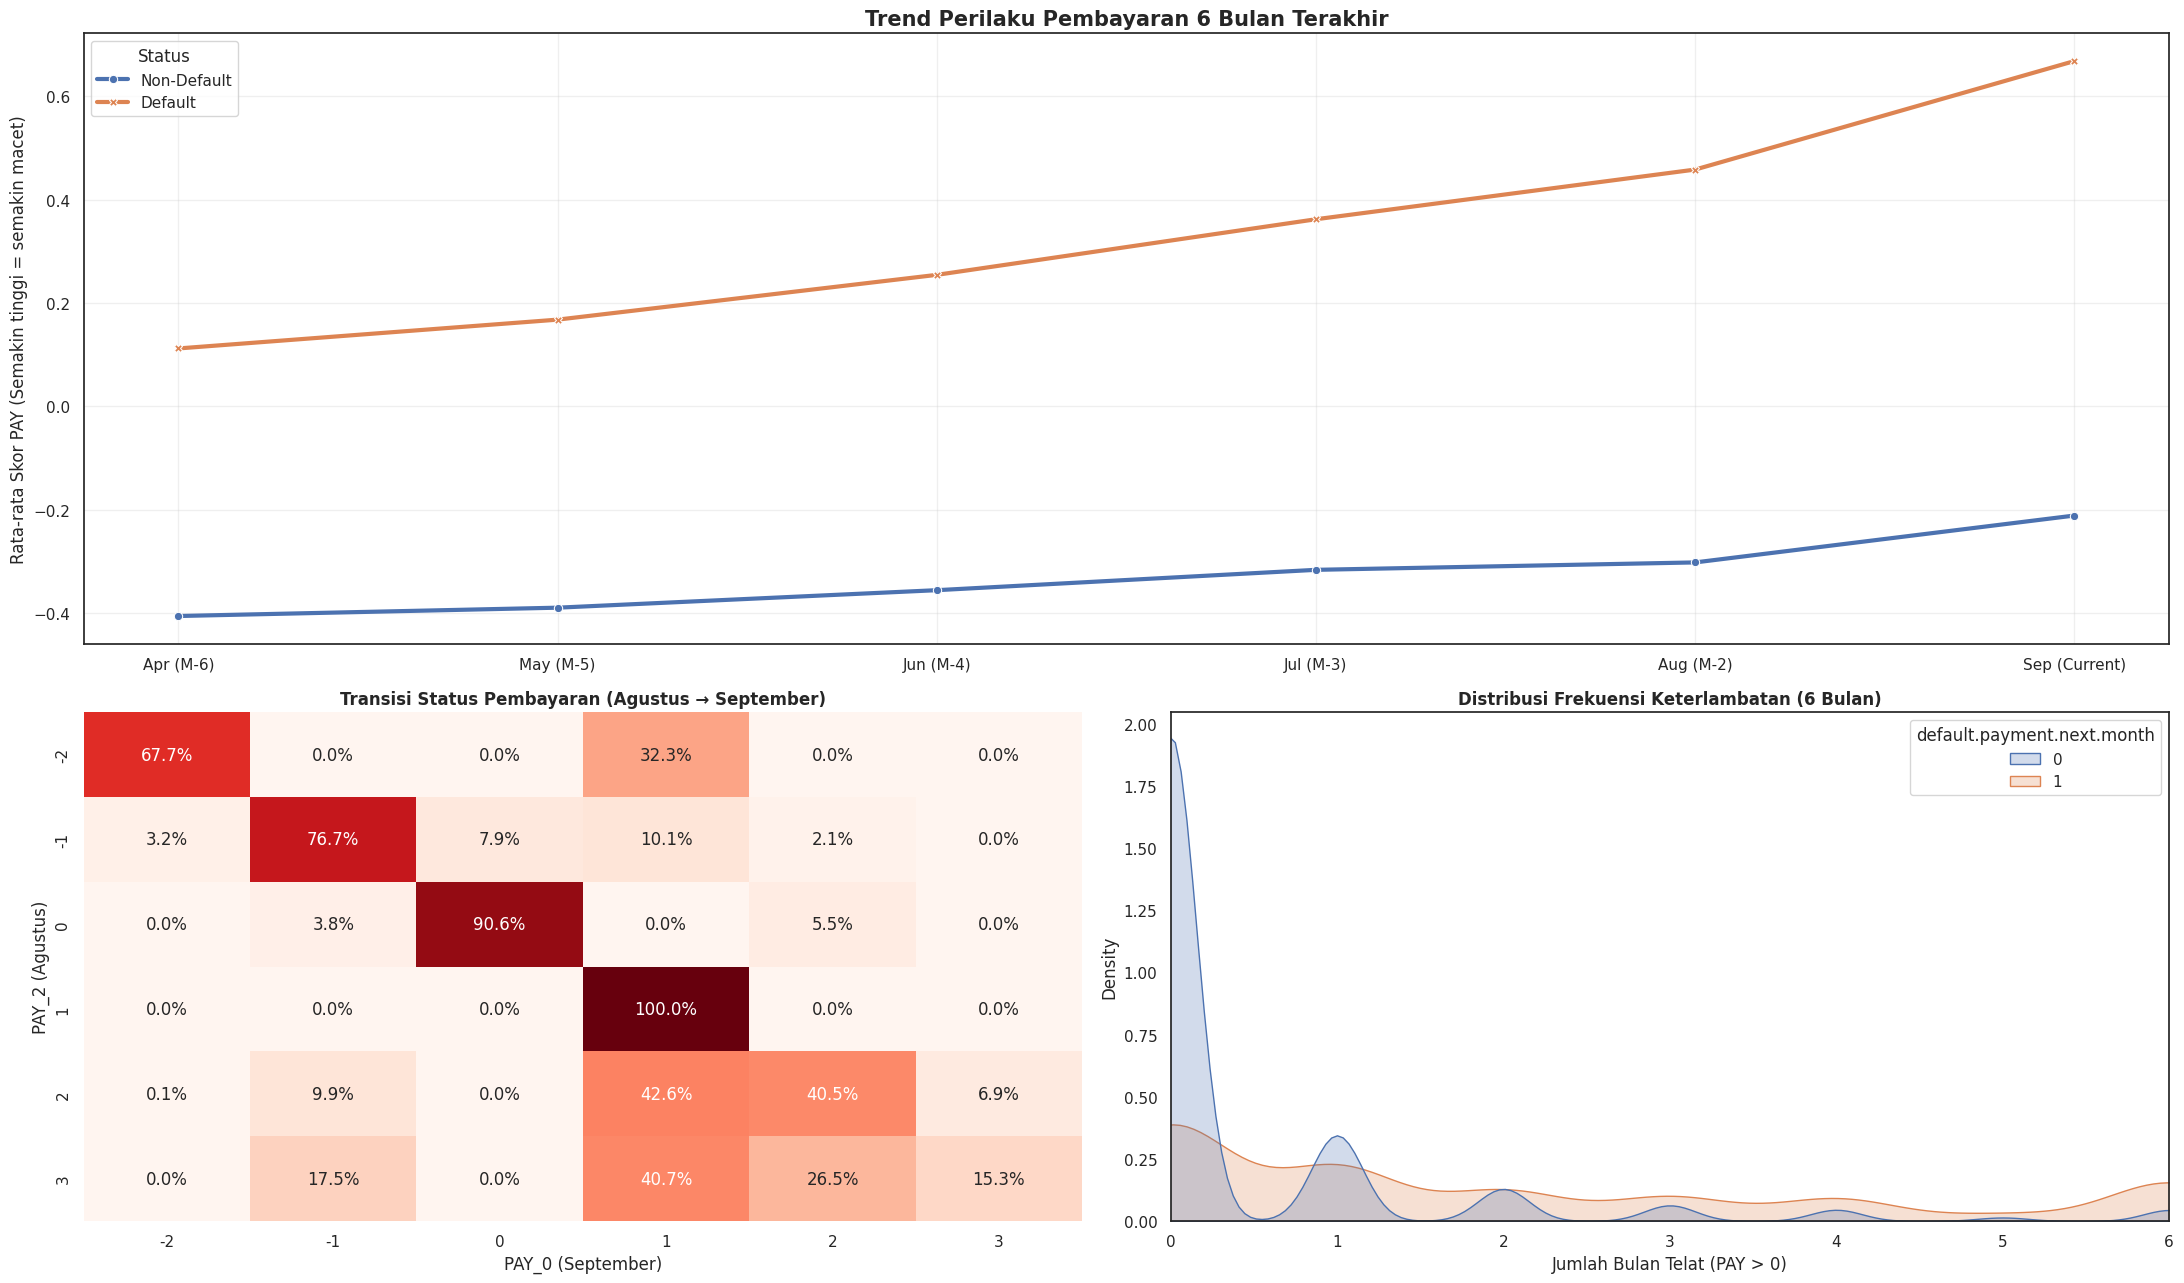

In [19]:
col_names_map = {
    'PAY_6': 'Apr (M-6)', 'PAY_5': 'May (M-5)', 'PAY_4': 'Jun (M-4)',
    'PAY_3': 'Jul (M-3)', 'PAY_2': 'Aug (M-2)', 'PAY_0': 'Sep (Current)'
}

fig = plt.figure(figsize=(22, 13))
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])

#1
ax1 = fig.add_subplot(gs[0, :])

trend_data = (
    df.groupby('default.payment.next.month')[pay_cols_chrono]
      .mean()
      .T
      .reset_index()
)

trend_data.columns = ['Month', 'Non-Default', 'Default']
trend_data['Month_Label'] = trend_data['Month'].map(col_names_map)

trend_melt = trend_data.melt(
    id_vars=['Month', 'Month_Label'],
    value_vars=['Non-Default', 'Default'],
    var_name='Status',
    value_name='Avg_PAY_Score'
)

sns.lineplot(
    data=trend_melt,
    x='Month_Label',
    y='Avg_PAY_Score',
    hue='Status',
    style='Status',
    markers=True,
    dashes=False,
    linewidth=3,
    ax=ax1
)

ax1.set_title('Trend Perilaku Pembayaran 6 Bulan Terakhir', fontsize=15, fontweight='bold')
ax1.set_ylabel('Rata-rata Skor PAY (Semakin tinggi = semakin macet)')
ax1.set_xlabel('')
ax1.grid(True, alpha=0.3)


#2
ax2 = fig.add_subplot(gs[1, 0])

filter_range = [-2, -1, 0, 1, 2, 3]
subset_transisi = df[
    df['PAY_2'].isin(filter_range) &
    df['PAY_0'].isin(filter_range)
]

transisi = pd.crosstab(
    subset_transisi['PAY_2'],
    subset_transisi['PAY_0'],
    normalize='index'
)

sns.heatmap(
    transisi,
    annot=True,
    fmt='.1%',
    cmap='Reds',
    cbar=False,
    ax=ax2
)

ax2.set_title('Transisi Status Pembayaran (Agustus → September)', fontweight='bold')
ax2.set_ylabel('PAY_2 (Agustus)')
ax2.set_xlabel('PAY_0 (September)')

#3
ax3 = fig.add_subplot(gs[1, 1])

sns.kdeplot(
    data=df,
    x='num_late_payments',
    hue='default.payment.next.month',
    fill=True,
    common_norm=False,
    ax=ax3,
    warn_singular=False
)

ax3.set_title('Distribusi Frekuensi Keterlambatan (6 Bulan)', fontweight='bold')
ax3.set_xlabel('Jumlah Bulan Telat (PAY > 0)')
ax3.set_xlim(0, 6)

plt.tight_layout()
plt.show()

heatmap Korelasi

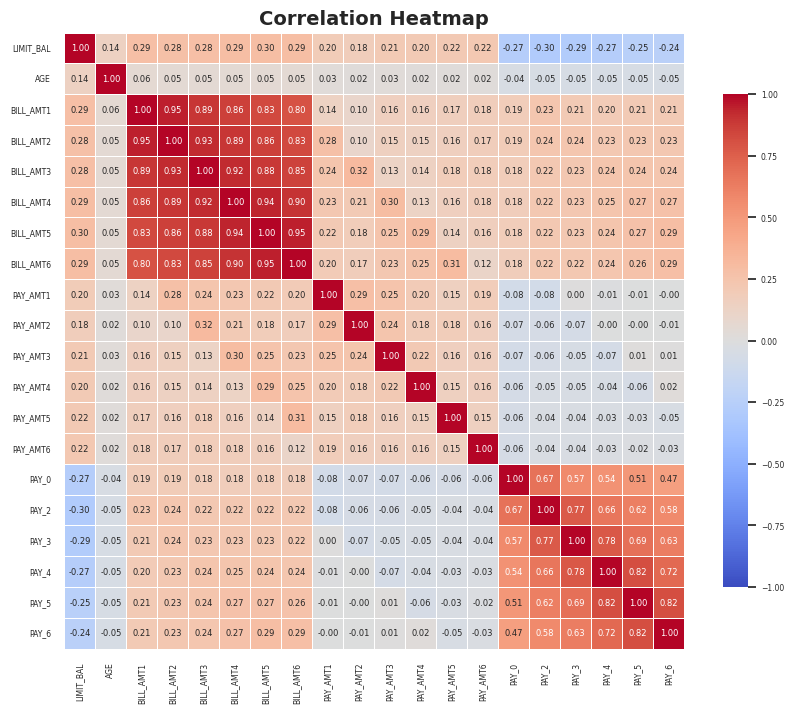

In [20]:
sns.set(style='white', font_scale=.5)

corr_features = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]

df_corr = df[corr_features]

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr[corr_features].corr(method='pearson')

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.yticks(rotation=0)
plt.show()

EDA Segmentasi

In [21]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low (<100k)', 'Medium (100k-300k)', 'High (>300k)']
df['Limit_Category'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
df['Avg_Bill_Amt'] = df[bill_cols].mean(axis=1)
df['Utilization_Rate'] = df['Avg_Bill_Amt'] / df['LIMIT_BAL']

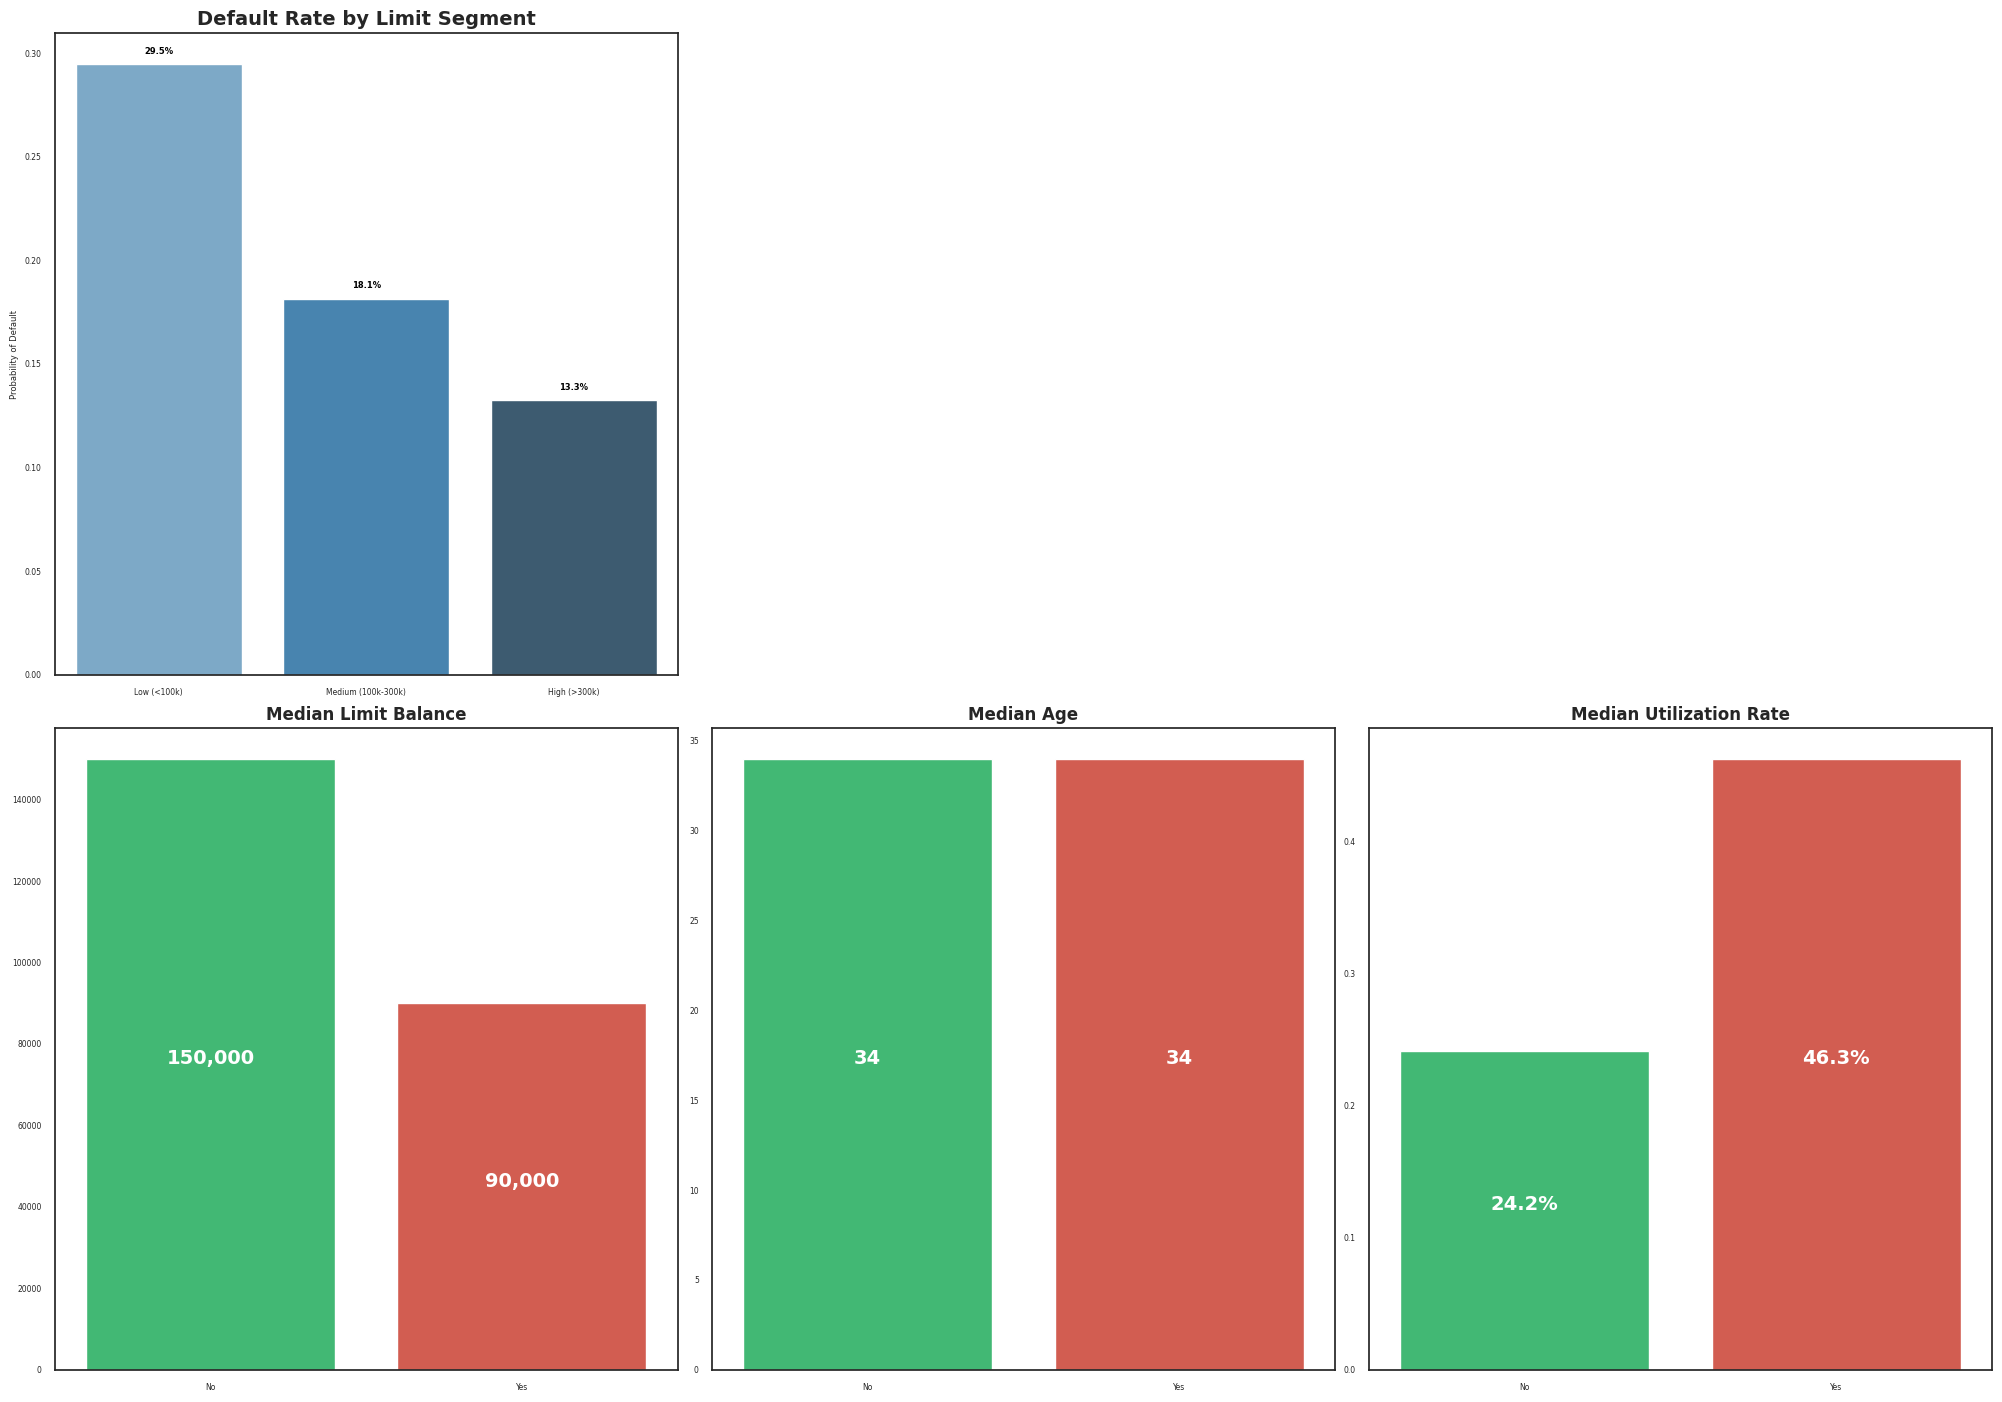

In [22]:
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 3)

# segmentasi LIMIT_BAL
ax1 = fig.add_subplot(gs[0, 0])

risk_per_segment = df.groupby('Limit_Category')['default.payment.next.month'].mean().reset_index()

sns.barplot(data=risk_per_segment, x='Limit_Category', y='default.payment.next.month',
            palette='Blues_d', ax=ax1)

ax1.set_title('Default Rate by Limit Segment', fontsize=14, fontweight='bold')
ax1.set_ylabel('Probability of Default')
ax1.set_xlabel('')

for index, row in risk_per_segment.iterrows():
    ax1.text(index, row['default.payment.next.month'] + 0.005,
             f"{row['default.payment.next.month']:.1%}", color='black', ha="center", fontweight='bold')

# profiling default payment next month
features_profile = ['LIMIT_BAL', 'AGE', 'Utilization_Rate']
titles = ['Median Limit Balance', 'Median Age', 'Median Utilization Rate']

profile_summary = df.groupby('default.payment.next.month')[features_profile].median().reset_index()
profile_summary['default.payment.next.month'] = profile_summary['default.payment.next.month'].map({0: 'No', 1: 'Yes'})

colors = ['#2ecc71', '#e74c3c']

for i, col in enumerate(features_profile):
    ax = fig.add_subplot(gs[1, i])

    sns.barplot(data=profile_summary, x='default.payment.next.month', y=col, palette=colors, ax=ax)

    ax.set_title(titles[i], fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

    for p in ax.patches:
        height = p.get_height()
        if col == 'Utilization_Rate':
            label = f"{height:.1%}"
        elif col == 'LIMIT_BAL':
            label = f"{height:,.0f}"
        else:
            label = f"{height:.0f}"

        ax.text(p.get_x() + p.get_width() / 2., height / 2, label,
                ha="center", color="white", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Training Model

In [23]:
numerical_features = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

categorical_features = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3',
    'PAY_4', 'PAY_5', 'PAY_6'
]

for col in categorical_features:
  df[col] = df[col].astype(str)

In [24]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
    )

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

In [26]:
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('model', GaussianNB())])

pred n eval

In [27]:
y_pred = nb_pipeline.predict(X_test)
y_proba = nb_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4673
           1       0.64      0.12      0.20      1327

    accuracy                           0.79      6000
   macro avg       0.72      0.55      0.54      6000
weighted avg       0.76      0.79      0.73      6000



cm

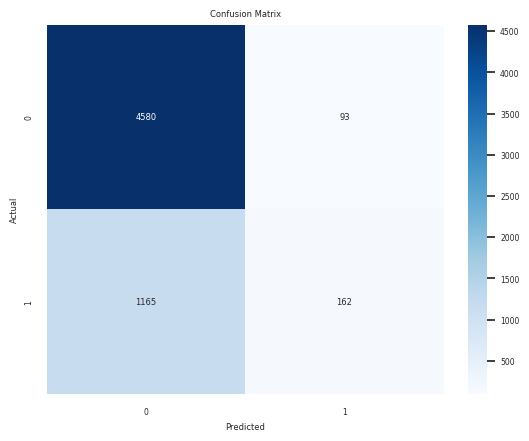

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC

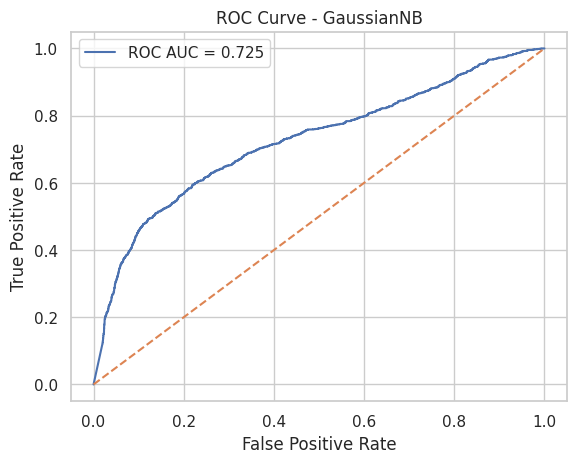

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

sns.set(style='whitegrid', font_scale=1.0)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB')
plt.legend()
plt.show()

precision recall

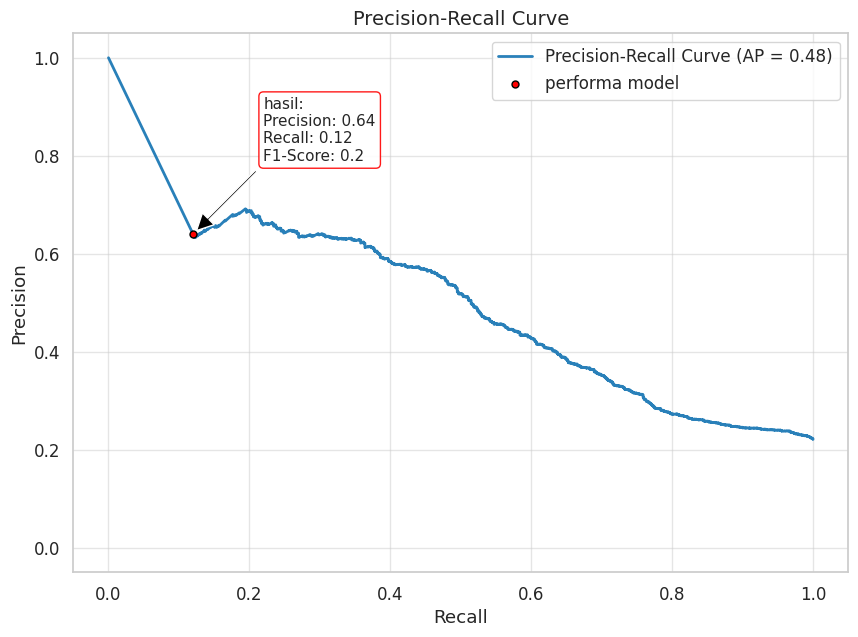

In [30]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

current_recall = 0.12
current_precision = 0.64
current_f1 = 0.20

sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(10, 7))

#a
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AP = {ap_score:.2f})',
         linewidth=2, color='#2980b9')

#b
plt.scatter(current_recall, current_precision, marker='o', color='red', s=25,
            label='performa model', zorder=5, edgecolors='black')

#c
text_label = (f"hasil:\n"
              f"Precision: {current_precision}\n"
              f"Recall: {current_recall}\n"
              f"F1-Score: {current_f1}")

plt.annotate(text_label,
             xy=(current_recall, current_precision),
             xytext=(current_recall + 0.1, current_precision + 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.9),
             fontsize=11)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='upper right')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(True, alpha=0.5)

plt.show()